In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=4)
pd.set_option('precision', 4)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
1104,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),98.20,7015.9,False
205,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,84.80,84.8,True
2742,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,635.6,True
2047,Male,0,No,No,10,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,98.90,1064.95,False
3545,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [4]:
numeric_data = data.select_dtypes(include=np.number)

In [5]:
data.TotalCharges.value_counts().head(10)

         6
19.55    6
20.2     6
20.5     4
20.3     4
19.9     4
20.05    4
45.3     4
24.4     3
74.9     3
Name: TotalCharges, dtype: int64

In [6]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)

In [7]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
3116,0,71,108.05,7532.15
1368,0,1,55.30,55.30
257,1,28,110.85,3204.40
2434,0,2,60.95,134.60
727,0,3,69.95,220.45


In [8]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'Security': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Backup': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Insurance': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Support': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'TV': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Movies': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0},                     
                     'Internet': {'No': "No internet service"},
                    })
data = pd.concat([data.drop('Contract', axis=1),
                          pd.get_dummies(data['Contract'])], axis = 1)
data = pd.concat([data.drop('Internet', axis=1), 
                          pd.get_dummies(data['Internet'])], axis = 1)
data = pd.concat([data.drop('PaymentMethod', axis=1),
                          pd.get_dummies(data['PaymentMethod'])], axis = 1)
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,Month-to-month,One year,Two year,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Index,,,,,,,,,,,,,,,,,,,,,
2163,0,0,1,1,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
626,0,0,1,0,31,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
544,1,1,0,0,4,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3072,0,0,1,0,72,1,1,1,1,1,...,0,0,1,0,1,0,1,0,0,0
3018,1,0,0,0,13,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

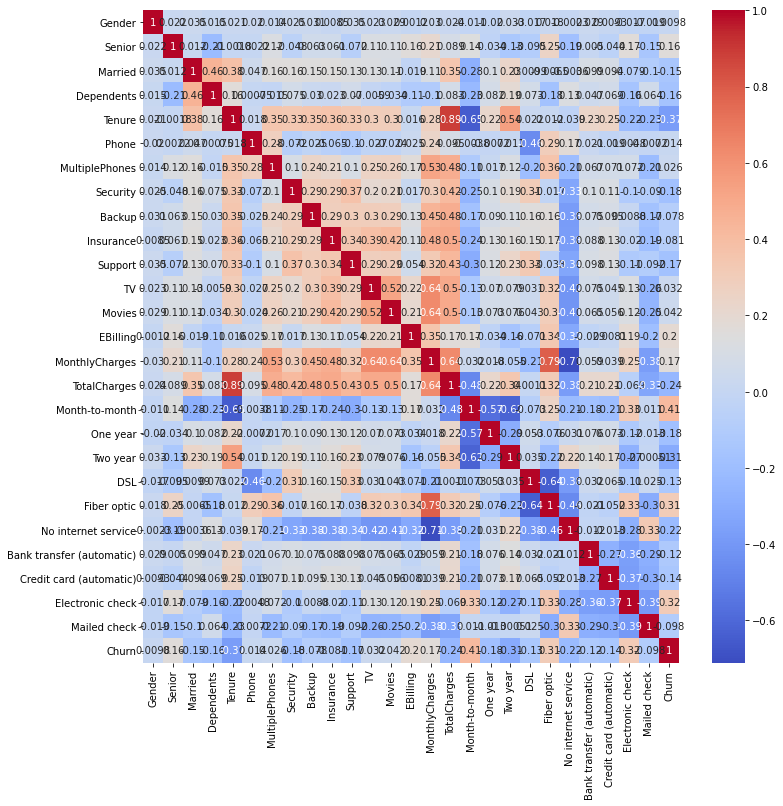

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2111
        True       1.00      1.00      1.00       761

    accuracy                           1.00      2872
   macro avg       1.00      1.00      1.00      2872
weighted avg       1.00      1.00      1.00      2872



In [12]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

Tree depth: 23


<Figure size 5000x4000 with 0 Axes>

In [13]:
dt_test_predictions = dt.predict (X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))


Test evaluation
              precision    recall  f1-score   support

       False       0.81      0.83      0.82       528
        True       0.50      0.47      0.48       191

    accuracy                           0.73       719
   macro avg       0.66      0.65      0.65       719
weighted avg       0.73      0.73      0.73       719



In [14]:
smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
print(classification_report(Y_train, sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))


Tree depth: 15
Train evaluation
              precision    recall  f1-score   support

       False       0.88      0.94      0.91      2111
        True       0.80      0.66      0.72       761

    accuracy                           0.87      2872
   macro avg       0.84      0.80      0.82      2872
weighted avg       0.86      0.87      0.86      2872

Test evaluation
              precision    recall  f1-score   support

       False       0.82      0.88      0.85       528
        True       0.58      0.46      0.51       191

    accuracy                           0.77       719
   macro avg       0.70      0.67      0.68       719
weighted avg       0.75      0.77      0.76       719



In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 145 out of 160 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.1s finished


In [16]:
grid.best_score_

0.6804456952289651

In [17]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 9}

In [18]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))

print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.87      0.93      0.90      2111
        True       0.76      0.63      0.69       761

    accuracy                           0.85      2872
   macro avg       0.82      0.78      0.80      2872
weighted avg       0.85      0.85      0.85      2872

Test evaluation
              precision    recall  f1-score   support

       False       0.81      0.89      0.85       528
        True       0.58      0.43      0.50       191

    accuracy                           0.77       719
   macro avg       0.70      0.66      0.67       719
weighted avg       0.75      0.77      0.76       719



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 5, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


Train evaluation
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      2111
        True       0.65      0.53      0.59       761

    accuracy                           0.80      2872
   macro avg       0.75      0.71      0.73      2872
weighted avg       0.79      0.80      0.79      2872



In [20]:
lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))


Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.91      0.87       528
        True       0.68      0.51      0.59       191

    accuracy                           0.81       719
   macro avg       0.76      0.71      0.73       719
weighted avg       0.80      0.81      0.80       719



In [21]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Churn
Index,
807,True
3026,False
1779,True
773,False
1931,False


In [22]:
X_train = numeric_data
X_test = pd.read_csv('test.csv', index_col=0)
Y_train = data.Churn

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [23]:
X_test.TotalCharges = X_test.TotalCharges.replace(' ', 0).astype(float)
X_test.TotalCharges.value_counts().head()

19.75    6
19.30    4
0.00     4
20.20    4
69.95    3
Name: TotalCharges, dtype: int64

In [24]:
X_test = X_test.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'Security': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Backup': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Insurance': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Support': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'TV': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Movies': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0},                     
                     'Internet': {'No': "No internet service"},
                    })
X_test = pd.concat([X_test.drop('Contract', axis=1),
                          pd.get_dummies(X_test['Contract'])], axis = 1)
X_test = pd.concat([X_test.drop('Internet', axis=1), 
                          pd.get_dummies(X_test['Internet'])], axis = 1)
X_test = pd.concat([X_test.drop('PaymentMethod', axis=1),
                          pd.get_dummies(X_test['PaymentMethod'])], axis = 1)
X_test.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,Month-to-month,One year,Two year,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Index,,,,,,,,,,,,,,,,,,,,,
2349,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2183,1,0,1,1,23,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
491,1,0,0,0,4,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
914,0,0,0,0,4,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2053,0,0,0,0,20,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [25]:
X_test_numeric_data = X_test.select_dtypes(include=np.number)
X_test_numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,Month-to-month,One year,Two year,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Index,,,,,,,,,,,,,,,,,,,,,
259,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
974,1,0,0,0,63,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1981,1,0,0,0,3,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
529,0,0,0,0,61,1,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0
2185,0,0,1,0,72,1,1,1,1,1,...,0,0,1,0,1,0,1,0,0,0


In [26]:
from sklearn.ensemble import AdaBoostClassifier
answer = AdaBoostClassifier()
answer.fit(X_train, Y_train)
answer_train_predictions = answer.predict(X_train)

print('Train evaluation')
print(classification_report(Y_train, answer_train_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      2639
        True       0.68      0.52      0.59       952

    accuracy                           0.81      3591
   macro avg       0.76      0.71      0.73      3591
weighted avg       0.80      0.81      0.80      3591



In [27]:
answer_test_predictions = answer.predict(X_test)

In [28]:
result = pd.DataFrame(answer_test_predictions)
result.columns = ['Churn']
result.to_csv('result.csv', index_label = 'Index')

In [29]:
pd.read_csv('result.csv')

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,True
